# Scan world aerosols during one year

- Author :Sylvie Dagoret-Campagne
- affiliation : LAL,IN2P3,CNRS
- organization : LSST 

- creation : Monday 25th April 2016

In [186]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import h5py
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [187]:
year_number=2007   # choose the month number
month_start=0      # choose first month
month_stop=11      # choose last month
month_numbers=np.arange(month_start,month_stop+1)
month_stringnumber=['01','02','03','04','05','06','07','08','09','10','11','12']
number_of_monthes=month_numbers.shape[0]

In [188]:
path_root='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00'
fullpath_root=os.path.join(os.path.join(path_root,str(year_number)),'hdf5')


In [189]:
filename_base='CAL_LID_L3_APro_AllSky-Standard-V3-00' # 

### Specify Input Filenames
- day-  : CAL_LID_L3_APro_AllSky-Standard-V3-00.2006-06D.h5
- night : CAL_LID_L3_APro_AllSky-Standard-V3-00.2006-06N.h5

In [190]:
dayfile_extension= [ str(year_number)+'-'+month_stringnumber[ix]+'D'+'.h5' for ix in month_numbers]

In [191]:
nightfile_extension= [ str(year_number)+'-'+month_stringnumber[ix]+'N'+'.h5' for ix in month_numbers]

In [192]:
dayfiles_fullname=[os.path.join(fullpath_root,filename_base+'.'+dayfile_extension[ix]) for ix in month_numbers ]

In [193]:
nightfiles_fullname=[os.path.join(fullpath_root, filename_base+'.'+nightfile_extension[ix]) for ix in month_numbers]

In [208]:
# /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2015/hdf5
#dayfiles_fullname

### defines pdf output filename containing plots

In [195]:
filename_pdf='Images/aerosol_worldmap_year_'+str(year_number)+'.pdf'

In [196]:
pp = PdfPages(filename_pdf)

### LSST site

In [197]:
#LSST site
Longitude_lsst = -70.7366833333333 # deg
Latitude_lsst = -30.240741666666672 #deg
Altitude_lsst = 2749.999999999238 #m

## work on first file, reading the data and showing the map for a first test


It set also variables usefull for the loop

In [198]:
fileindex=0

In [199]:
h5f = h5py.File(dayfiles_fullname[fileindex], "r")  # file on which one works

In [200]:
longitude=h5f['Longitude_Midpoint']   # shape =(1,72)
all_longitude=longitude[0,:]    # coordinates for X

In [201]:
latitude=h5f['Latitude_Midpoint']     # shape = (1,85)
all_latitude=latitude[0,:]      # coordinate for Y

In [202]:
X,Y=np.meshgrid(all_longitude,all_latitude) # defines the mesh for the map

In [203]:
aod_mean=h5f['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
aod_arr=np.array(aod_mean)  # convert in a numpy array
aod_mean_clean=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data    

In [204]:
h5f.close()

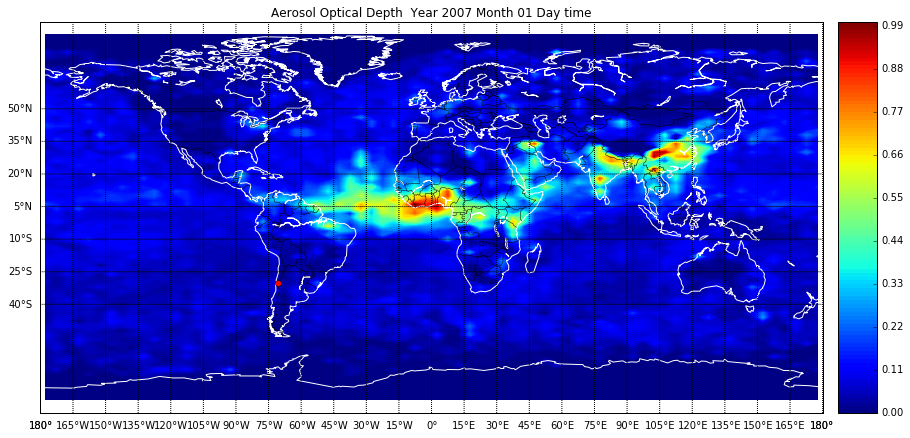

In [205]:
plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines(color="white")
map.drawcountries(color="black")
img=map.contourf(X, Y, aod_mean_clean,100)
map.colorbar(img,"right", size="5%", pad="2%")
map.drawparallels(np.arange(-40,61.,15.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,180.,15.),labels=[True,False,False,True])
xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
map.plot(xpt_lsst,ypt_lsst,'ro')  # plot a red dot there
#plt.text(xpt_lsst-100000,ypt_lsst-200000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='red', fontsize=15)
title = "Aerosol Optical Depth  Year %s Month %s Day time" % (year_number, month_stringnumber[fileindex])
plt.title(title)
#plt.savefig(pp, format='pdf')
plt.show()

## Loop to Open files, reading the data and showing the map

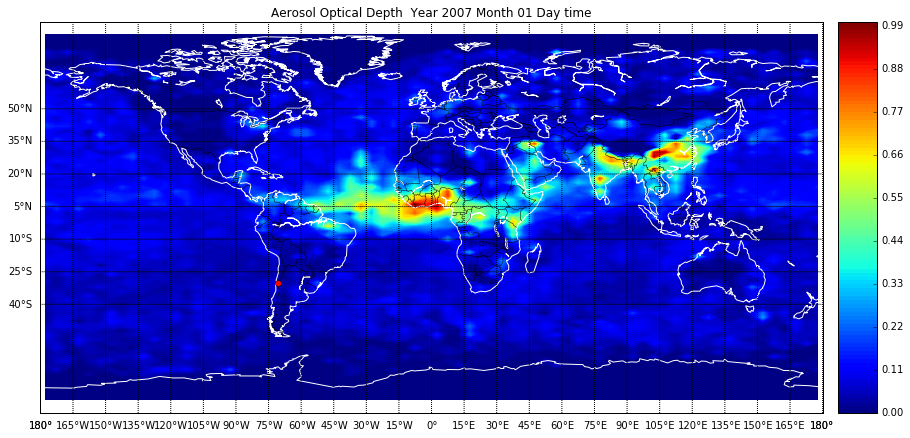

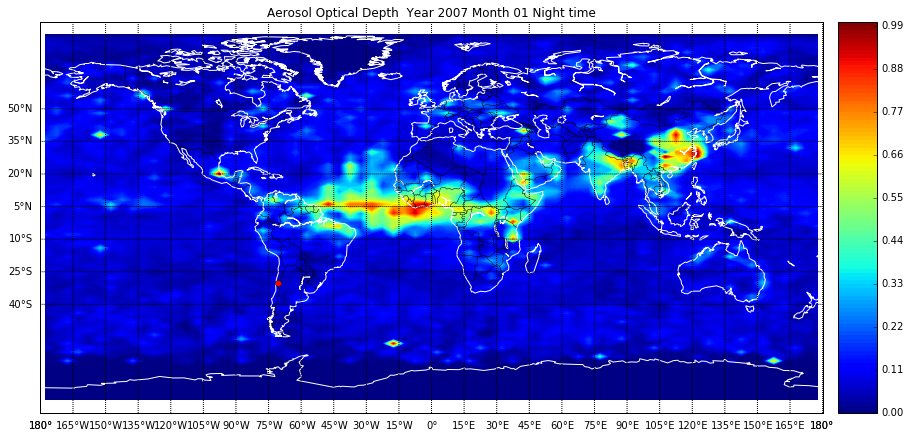

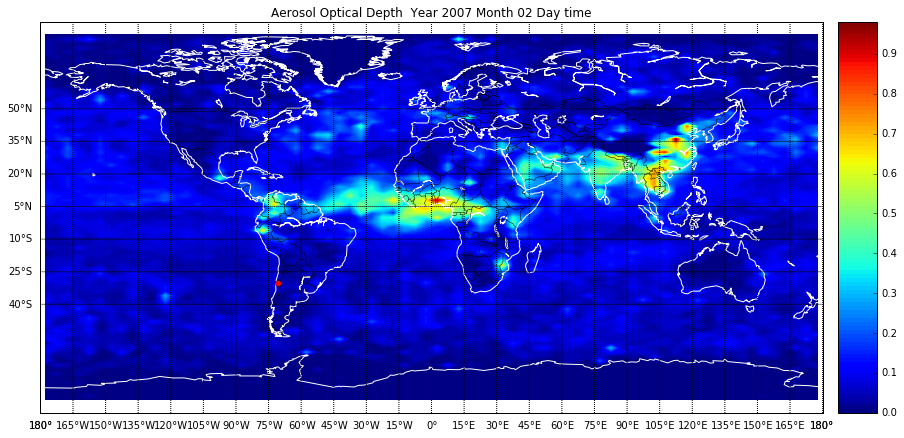

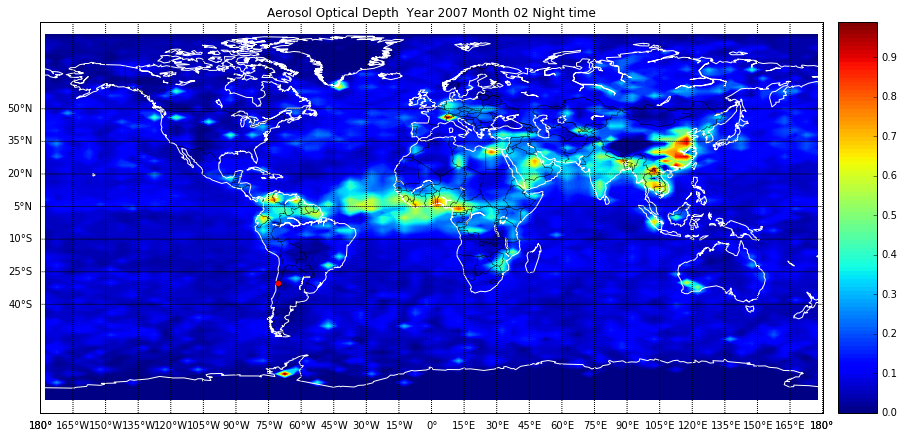

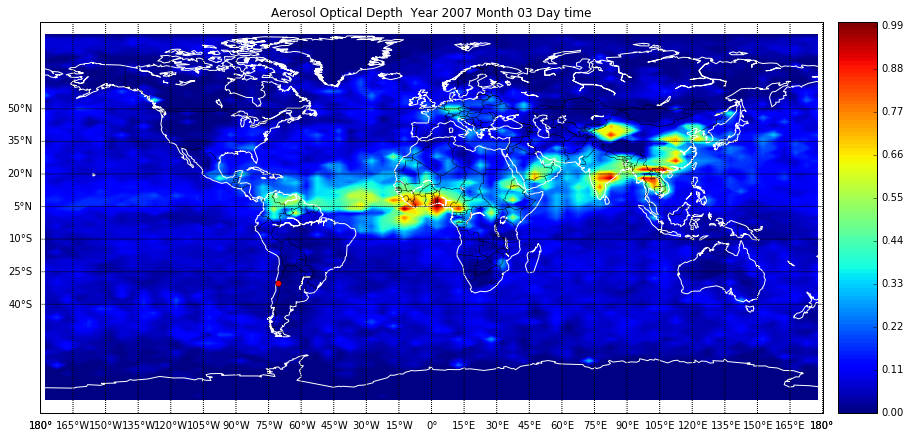

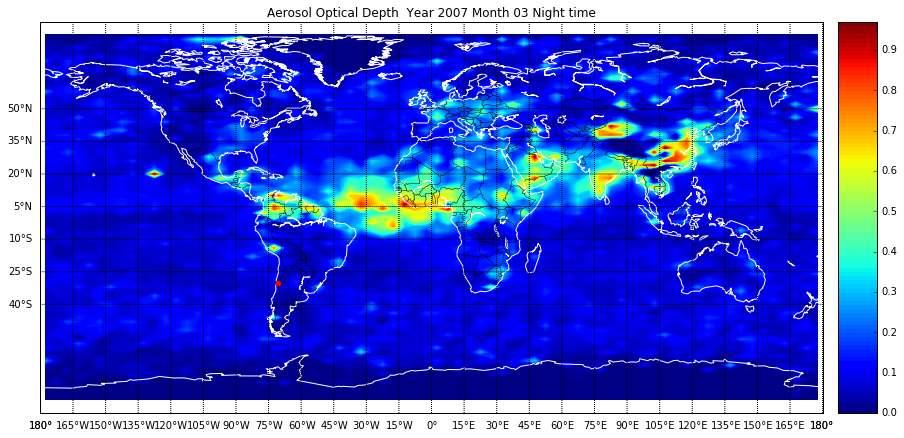

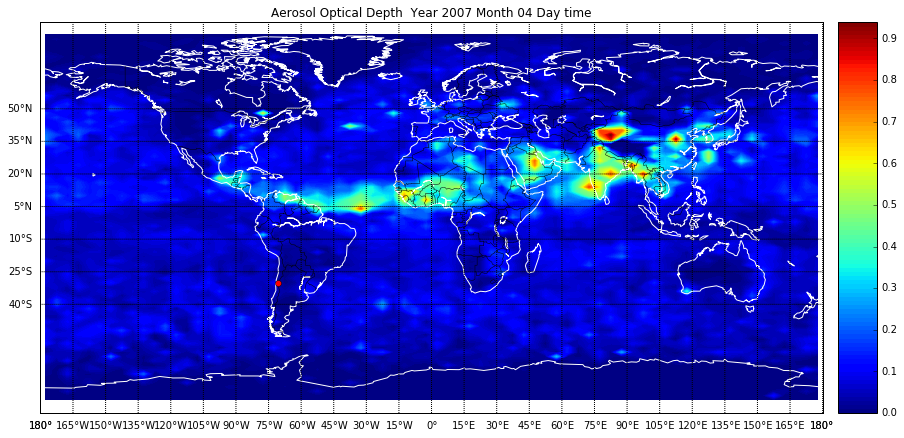

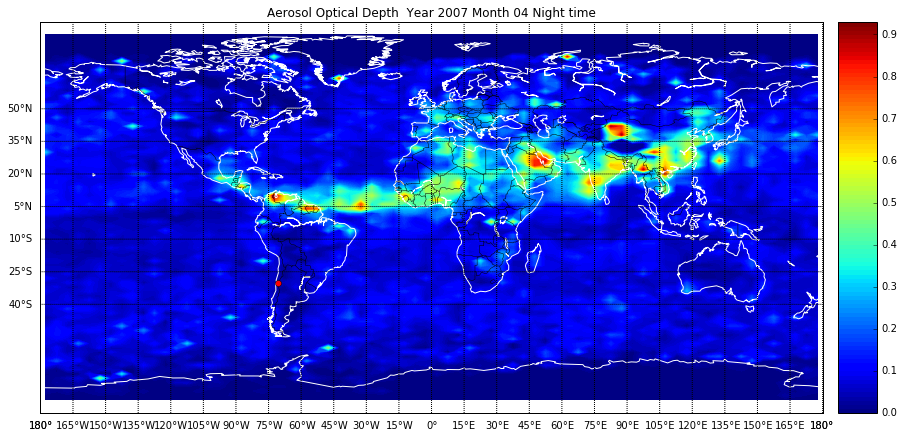

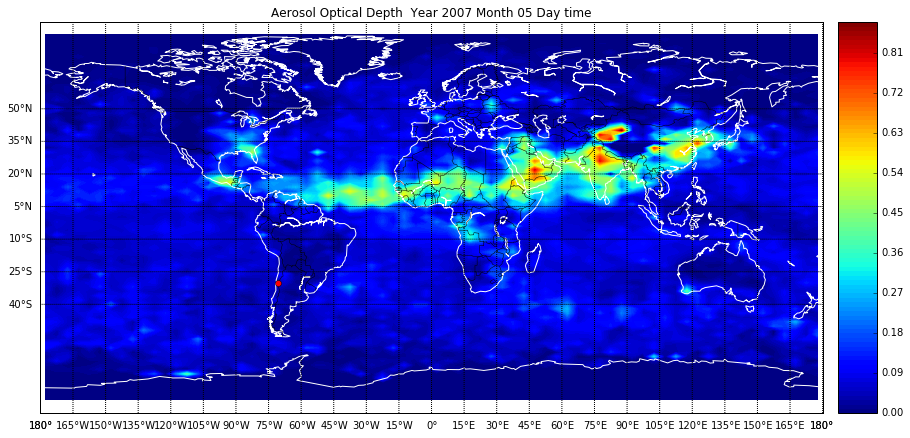

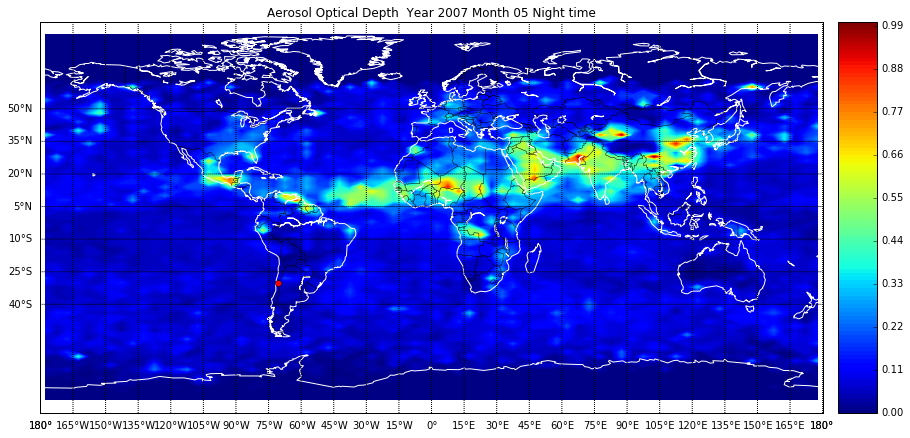

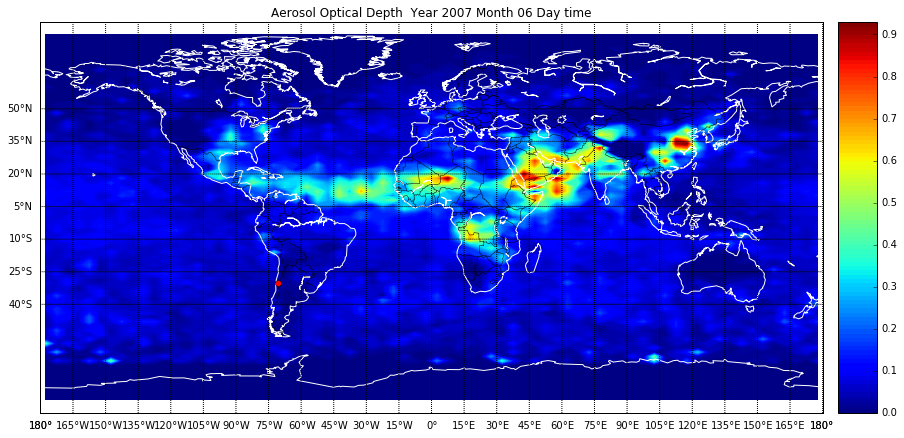

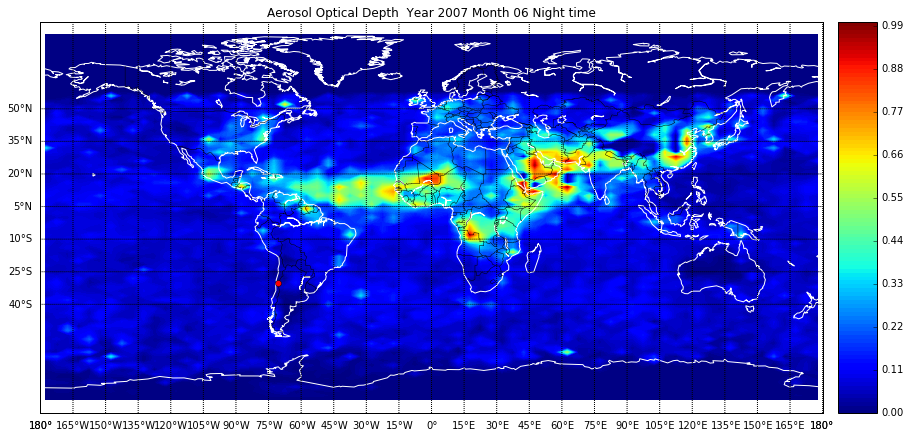

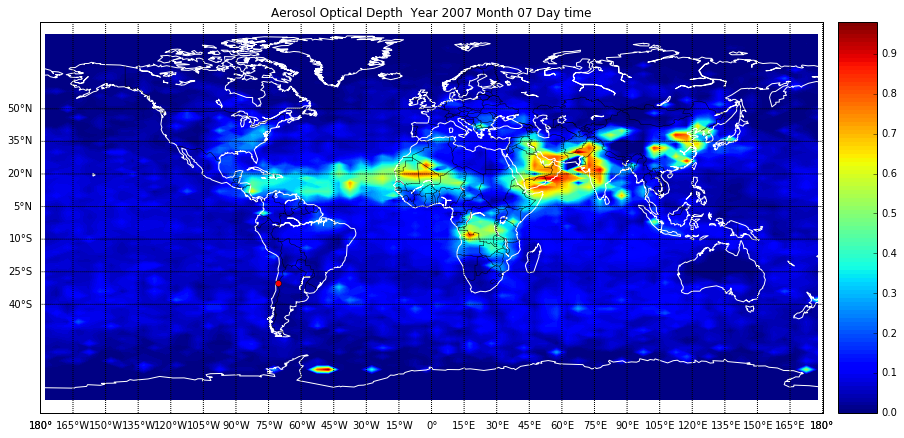

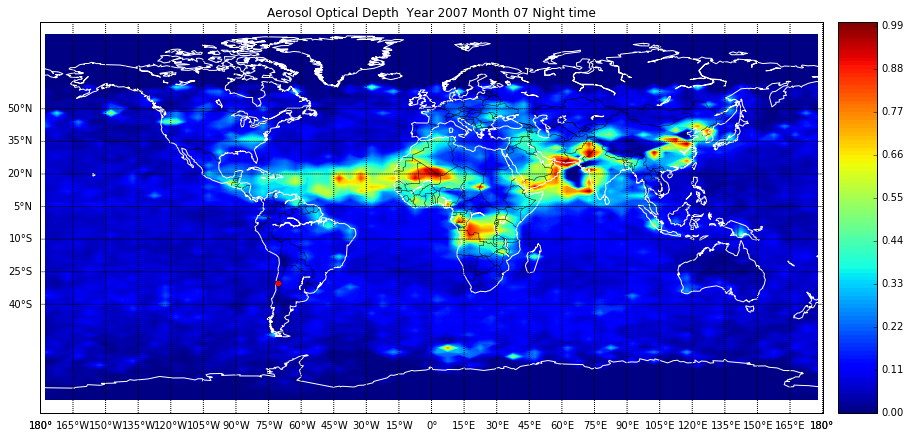

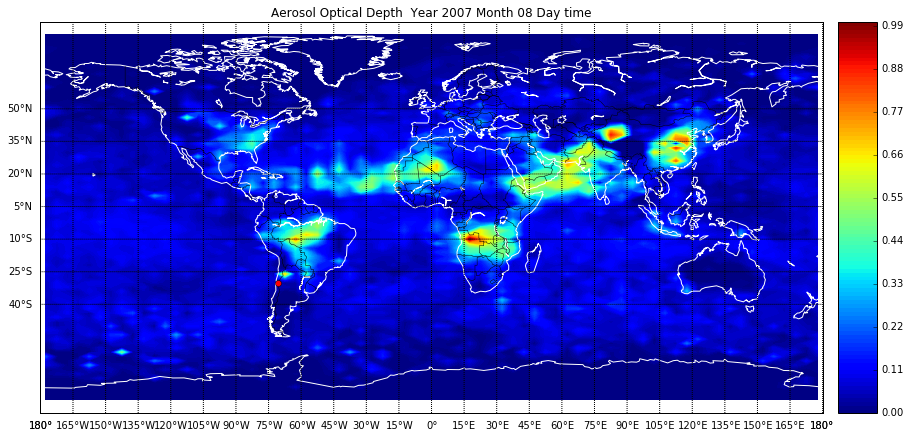

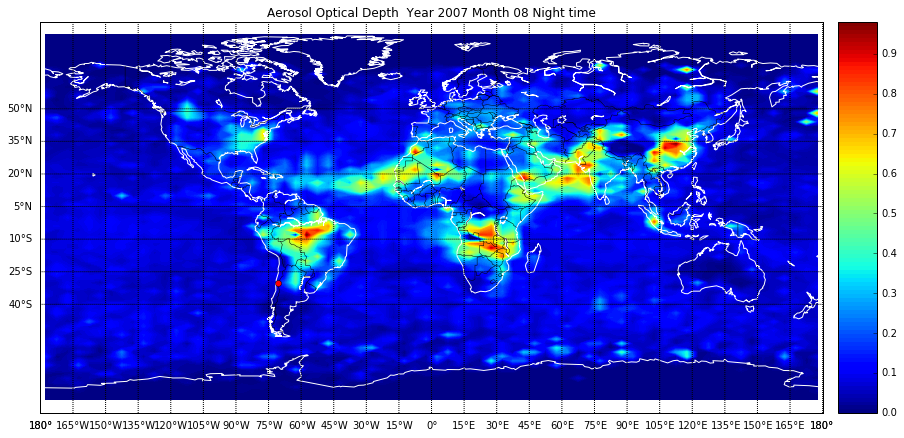

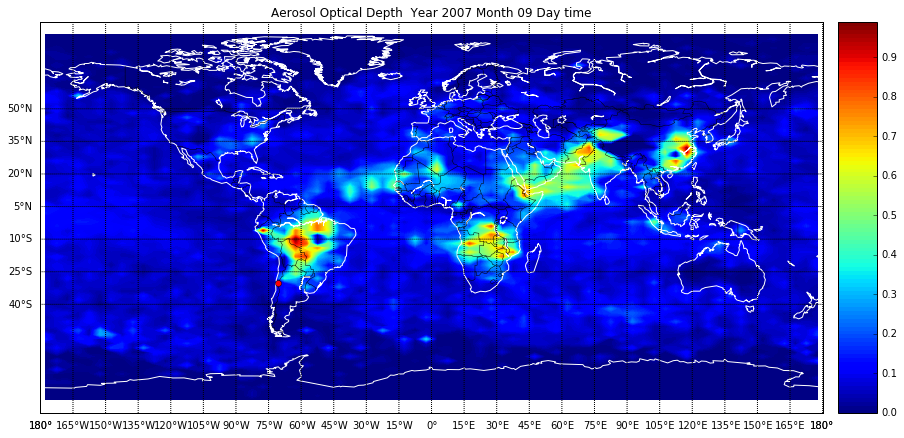

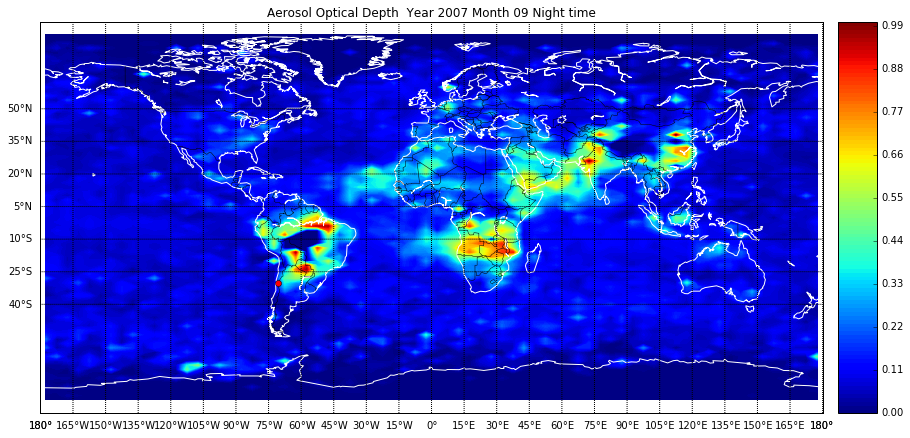

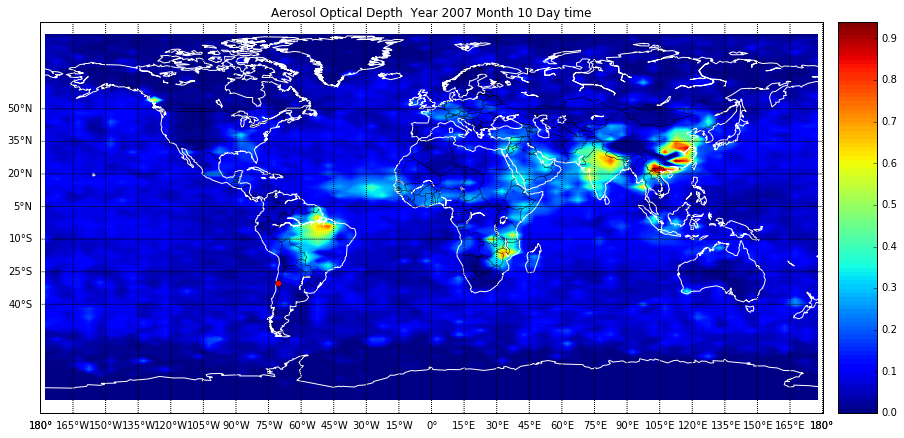

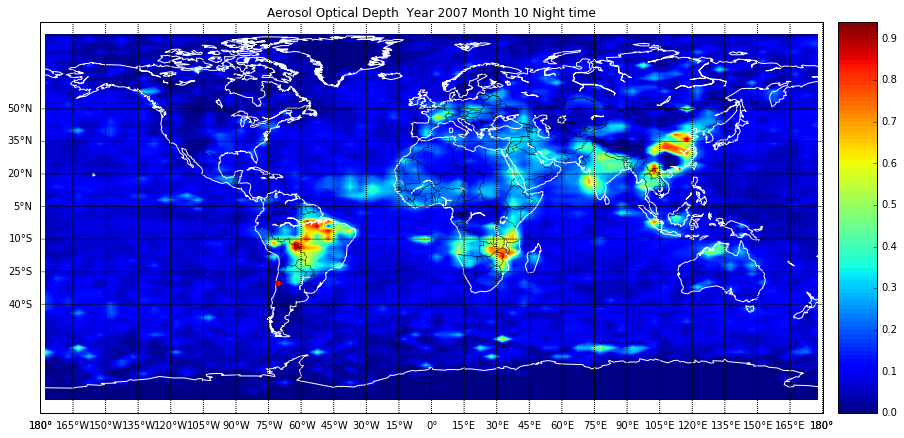

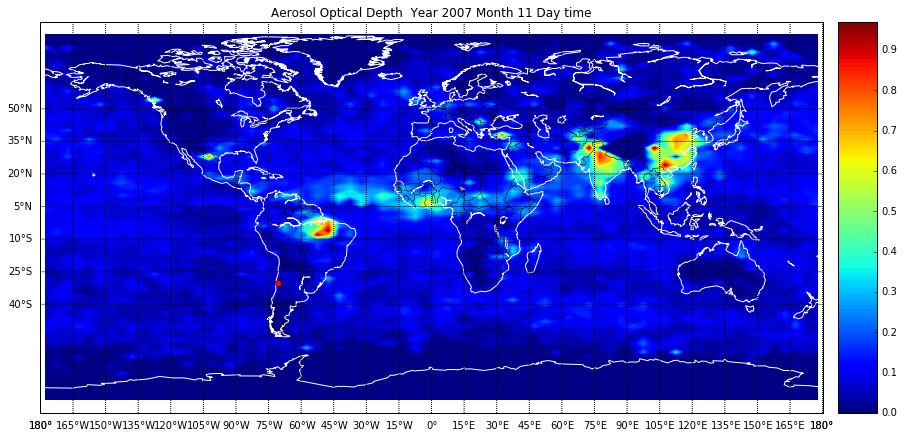

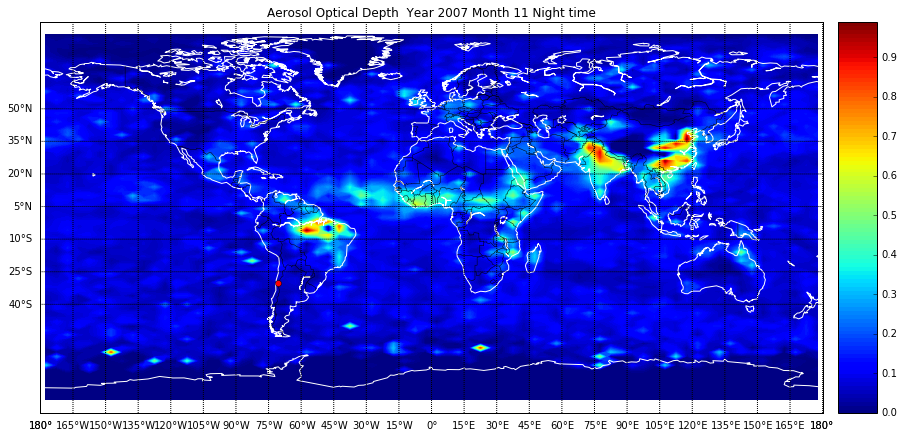

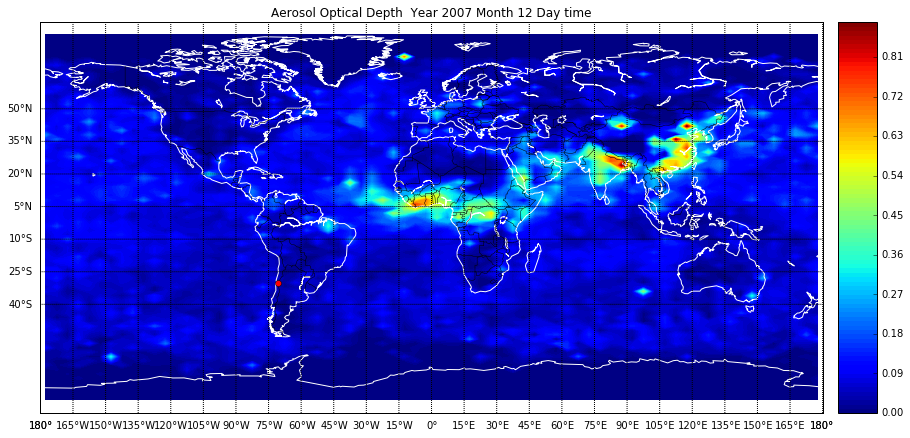

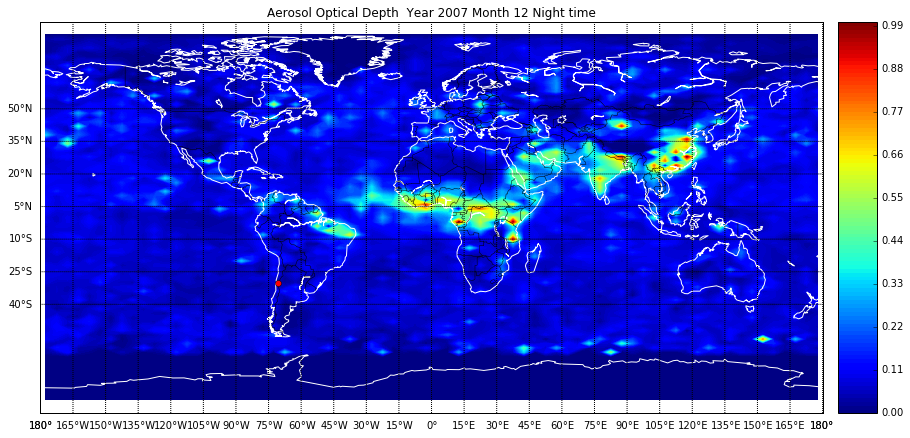

In [206]:
for imonth in month_numbers:
    h5fday = h5py.File(dayfiles_fullname[imonth], "r")  # file on which one works
    aod_mean_day=h5fday['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    aod_arr_day=np.array(aod_mean_day)  # convert in a numpy array
    aod_mean_clean_day=np.where(np.logical_and(aod_arr_day>0,aod_arr_day<1),aod_arr_day, 0 )  # clean the aod from creazy data    
    h5fday.close()
    h5fnight = h5py.File(nightfiles_fullname[imonth], "r")  # file on which one works
    aod_mean_night=h5fnight['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    aod_arr_night=np.array(aod_mean_night)  # convert in a numpy array
    aod_mean_clean_night=np.where(np.logical_and(aod_arr_night>0,aod_arr_night<1),aod_arr_night, 0 )  # clean the aod from creazy data    
    h5fnight.close()
    
    # day map for this month
    fig=plt.figure(figsize=(15,15))
    map = Basemap()
    map.drawcoastlines(color="white")
    map.drawcountries(color="black")
    img=map.contourf(X, Y, aod_mean_clean_day,100)
    map.colorbar(img,"right", size="5%", pad="2%")
    map.drawparallels(np.arange(-40,61.,15.),labels=[True,False,False,False])
    map.drawmeridians(np.arange(-180.,180.,15.),labels=[True,False,False,True])
    xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
    map.plot(xpt_lsst,ypt_lsst,'ro')  # plot a red dot there
    #plt.text(xpt_lsst-100000,ypt_lsst-200000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='red', fontsize=15)
    title = "Aerosol Optical Depth  Year %s Month %s Day time" % (year_number, month_stringnumber[imonth])
    plt.title(title)
    plt.savefig(pp, format='pdf')
    plt.show()
    
    #night map for this month
    fig=plt.figure(figsize=(15,15))
    map = Basemap()
    map.drawcoastlines(color="white")
    map.drawcountries(color="black")
    img=map.contourf(X, Y, aod_mean_clean_night,100)
    map.colorbar(img,"right", size="5%", pad="2%")
    map.drawparallels(np.arange(-40,61.,15.),labels=[True,False,False,False])
    map.drawmeridians(np.arange(-180.,180.,15.),labels=[True,False,False,True])
    xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
    map.plot(xpt_lsst,ypt_lsst,'ro')  # plot a red dot there
    #plt.text(xpt_lsst-100000,ypt_lsst-200000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='red', fontsize=15)
    title = "Aerosol Optical Depth  Year %s Month %s Night time" % (year_number, month_stringnumber[imonth])
    plt.title(title)
    plt.savefig(pp, format='pdf')
    plt.show()
    
    

In [207]:
pp.close()